In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D , MaxPooling2D , Flatten, Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import cv2

In [3]:
Train = pd.read_csv('/content/drive/MyDrive/Kaggle /Digit Recognition/train.csv')
Test = pd.read_csv('/content/drive/MyDrive/Kaggle /Digit Recognition/test.csv')

In [ ]:
Train.head()

In [5]:
Label = Train.loc[:,'label']
Train = Train.drop(columns=['label'])

In [6]:
train_img = Train.values
test_img = Test.values

In [7]:
train_img = train_img.reshape( (train_img.shape[0], 28, 28, 1) )
test_img = test_img.reshape( (test_img.shape[0], 28, 28, 1) )

In [25]:
print(train_img.shape)
print(test_img.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
model = Sequential()

model.add( Convolution2D( 32, 3, 3, input_shape=(28,28,1), activation='relu' ) )
model.add( MaxPooling2D( pool_size=(2,2) ) )

model.add( Convolution2D( 64, 2, 2, activation='relu' ) )
model.add( MaxPooling2D( pool_size=(2,2) ) )

model.add( Convolution2D( 128, 1, 1, activation='relu' ) )
model.add( MaxPooling2D( pool_size=(1,1) ) )

model.add( Convolution2D( 256, 1, 1, activation='relu' ) )
model.add( MaxPooling2D( pool_size=(1,1) ) )

model.add( Flatten() )

model.add( Dense( units=128, activation='relu' ) )
model.add( Dropout( 0.4 ) )
model.add( Dense( units=128, activation='relu' ) )
model.add( Dense( units=10, activation='softmax' ) )

model.compile( optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )
model.fit( train_img, Label, epochs=40, batch_size=64 )

The model prediction is 2


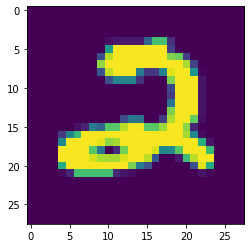

In [35]:
result = model.predict( test_img[0].reshape( (1, 28, 28, 1) ) )
val = np.argmax( result, axis=-1 )[0]
plt.imshow( test_img[0].reshape( (28, 28) ) )
print("The model prediction is {0}".format(val))

The model prediction is 0


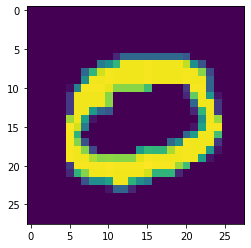

In [36]:
plt.imshow( test_img[1].reshape( (28, 28) ) )
result = model.predict( test_img[1].reshape( (1, 28, 28, 1) ) )
val = np.argmax( result, axis=-1 )[0]
print("The model prediction is {0}".format(val))

The model prediction is 9


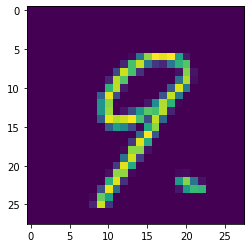

In [37]:
plt.imshow( test_img[2].reshape( (28, 28) ) )
result = model.predict( test_img[2].reshape( (1, 28, 28, 1) ) )
val = np.argmax( result, axis=-1 )[0]
print("The model prediction is {0}".format(val))

In [19]:
final_result = model.predict( test_img )
final_result = np.argmax( final_result, axis=-1 )

In [20]:
submission = pd.read_csv('/content/drive/MyDrive/Kaggle /Digit Recognition/sample_submission.csv')

In [21]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [22]:
submission['Label'] = final_result

In [23]:
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,6
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [24]:
submission.to_csv('result.csv', index=False)